In [15]:
import pandas as pd

In [16]:
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170098 entries, 0 to 170097
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              170098 non-null  int64 
 1   PERIODO                         170098 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             170098 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          170098 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  168561 non-null  object
 5   ESTU_HORASSEMANATRABAJA         162458 non-null  object
 6   FAMI_ESTRATOVIVIENDA            162200 non-null  object
 7   FAMI_TIENEINTERNET              163522 non-null  object
 8   FAMI_EDUCACIONPADRE             164325 non-null  object
 9   FAMI_TIENELAVADORA              160294 non-null  object
 10  FAMI_TIENEAUTOMOVIL             159344 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           170097 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [29]:
total_datos_nulos = data.isnull().sum().sum()
datos_nulos_por_variable = data.isnull().sum()

total_datos_nulos, datos_nulos_por_variable


(73460,
 ID                                    0
 PERIODO                               0
 ESTU_PRGM_ACADEMICO                   0
 ESTU_PRGM_DEPARTAMENTO                0
 ESTU_VALORMATRICULAUNIVERSIDAD     1537
 ESTU_HORASSEMANATRABAJA            7640
 FAMI_ESTRATOVIVIENDA               7898
 FAMI_TIENEINTERNET                 6576
 FAMI_EDUCACIONPADRE                5773
 FAMI_TIENELAVADORA                 9804
 FAMI_TIENEAUTOMOVIL               10754
 ESTU_PRIVADO_LIBERTAD                 1
 ESTU_PAGOMATRICULAPROPIO           1590
 FAMI_TIENECOMPUTADOR               9419
 FAMI_TIENEINTERNET.1               6577
 FAMI_EDUCACIONMADRE                5890
 RENDIMIENTO_GLOBAL                    1
 dtype: int64)

Podemos observar que hay ciertas columnas con datos nulos los cuales mas adelante imputaremos o borraremos segun se requiera

In [18]:
data.describe(include='all')

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
count,170098.000000,170098.000000,170098,170098,168561,162458,162200,163522,164325,160294,159344,170097,168508,160679,163521,164208,170097
unique,NaN,NaN,901,31,8,5,7,2,13,2,2,2,2,2,2,12,4
top,NaN,NaN,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
freq,NaN,NaN,13187,69237,50045,61377,57473,145436,31570,138266,101302,170087,93722,146654,145436,35004,43066
mean,494473.815783,20198.372050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,285491.287746,10.522059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.000000,20183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,247726.250000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,494002.500000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,741216.250000,20203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Cantidad de estudiantes por programa academico**




In [19]:
estudiantes_por_programa = data['ESTU_PRGM_ACADEMICO'].value_counts()
estudiantes_por_programa

DERECHO                                13187
ADMINISTRACION DE EMPRESAS             12689
CONTADURIA PUBLICA                      9711
PSICOLOGIA                              7857
INGENIERIA INDUSTRIAL                   7023
                                       ...  
MERCADEO Y VENTAS                          1
ADMINISTRACION DE SISTEMAS                 1
NARRATIVAS DIGITALES                       1
ANTROPOLOGÍA                               1
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA        1
Name: ESTU_PRGM_ACADEMICO, Length: 901, dtype: int64

Veamos los 15 con mas cantidad de estudiantes

In [20]:
estudiantes_por_programa.head(15)

DERECHO                                13187
ADMINISTRACION DE EMPRESAS             12689
CONTADURIA PUBLICA                      9711
PSICOLOGIA                              7857
INGENIERIA INDUSTRIAL                   7023
ADMINISTRACIÓN DE EMPRESAS              6228
INGENIERIA CIVIL                        4785
MEDICINA                                4454
INGENIERIA DE SISTEMAS                  4256
PSICOLOGÍA                              4205
TRABAJO SOCIAL                          3190
ENFERMERIA                              2857
ARQUITECTURA                            2757
ADMINISTRACIÓN EN SALUD OCUPACIONAL     2689
CONTADURÍA PÚBLICA                      2671
Name: ESTU_PRGM_ACADEMICO, dtype: int64

##**Cantidad de estudiantes por departamento**

In [21]:
estudiantes_por_departamento = data['ESTU_PRGM_DEPARTAMENTO'].value_counts()
estudiantes_por_departamento

BOGOTÁ             69237
ANTIOQUIA          20486
VALLE              10921
ATLANTICO          10027
SANTANDER           7174
NORTE SANTANDER     5499
BOLIVAR             5027
BOYACA              3465
CUNDINAMARCA        3436
NARIÑO              3319
RISARALDA           3055
CORDOBA             3049
CALDAS              2941
TOLIMA              2921
CAUCA               2832
HUILA               2456
MAGDALENA           2312
SUCRE               2122
QUINDIO             2070
CESAR               2063
META                1966
LA GUAJIRA          1205
CHOCO               1029
CAQUETA              640
CASANARE             463
PUTUMAYO             211
ARAUCA               150
AMAZONAS               9
GUAVIARE               8
VAUPES                 3
SAN ANDRES             2
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

##**Porcentaje de estudiantes por estrato**

In [22]:
distribucion_estratos= data['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True)*100
distribucion_estratos

Estrato 2      35.433416
Estrato 3      31.846486
Estrato 1      16.815043
Estrato 4       9.968557
Estrato 5       3.550555
Estrato 6       1.918619
Sin Estrato     0.467324
Name: FAMI_ESTRATOVIVIENDA, dtype: float64

Podemos observar que hay cierta poblacion la cual no tiene estrato

##**Porcentaje de estudiantes por acceso a internet**

In [23]:
acceso_internet= data['FAMI_TIENEINTERNET'].value_counts(normalize=True)*100
acceso_internet

Si    88.939715
No    11.060285
Name: FAMI_TIENEINTERNET, dtype: float64

#¿El estrato afecta el rendimiento academico?

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

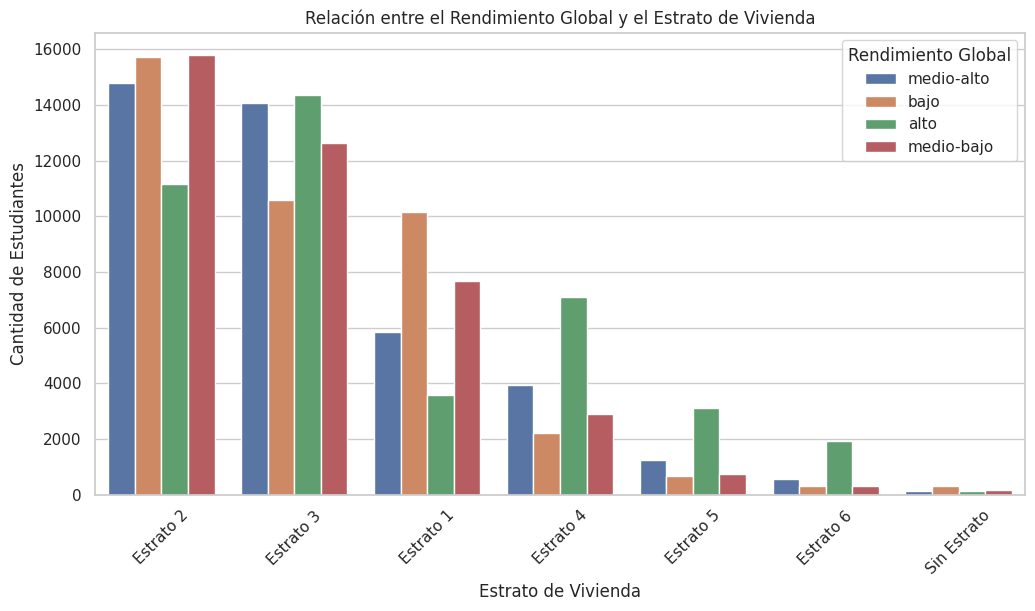

In [25]:

sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='FAMI_ESTRATOVIVIENDA', hue='RENDIMIENTO_GLOBAL', order=data['FAMI_ESTRATOVIVIENDA'].value_counts().index)
plt.title('Relación entre el Rendimiento Global y el Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45)
plt.legend(title='Rendimiento Global', loc='upper right')
plt.show()


* El rendimiento medio-alto es predominante en todos los estratos de vivienda.
* El rendimiento alto es más común en los estratos superiores (5 y 6).
* El rendimiento bajo es más visible en los estratos inferiores (1, 2 y 3).
* A medida que aumenta el estrato, parece haber una tendencia hacia un mejor rendimiento global, especialmente en los estratos 5 y 6.

#¿El acceso a internet afecta el rendimiento?

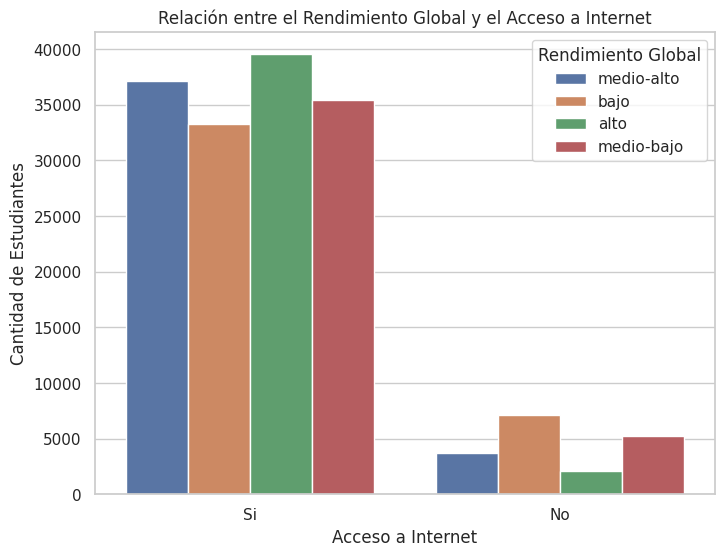

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='FAMI_TIENEINTERNET', hue='RENDIMIENTO_GLOBAL')
plt.title('Relación entre el Rendimiento Global y el Acceso a Internet')
plt.xlabel('Acceso a Internet')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Rendimiento Global', loc='upper right')
plt.show()

* En general, los estudiantes con acceso a Internet parecen tener un rendimiento global más alto.
* Es mas probable encontrar a alguien con rendimiento medio-bajo y bajo en las personas sin acceso a internet que en las personas con acceso a internet.

#¿Cual es el top 3 de Departamentos con mayor cantidad de estudiantes en rendimiento alto?

In [27]:
rendimiento_por_departamento = data.groupby(['ESTU_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL']).size().unstack(fill_value=0)
rendimiento_por_departamento['TOTAL'] = rendimiento_por_departamento.sum(axis=1)
rendimiento_por_departamento['PORCENTAJE_ALTO'] = (rendimiento_por_departamento['alto'] / rendimiento_por_departamento['TOTAL']) * 100
departamentos_ordenados_por_rendimiento_alto = rendimiento_por_departamento.sort_values('PORCENTAJE_ALTO', ascending=False)

departamentos_ordenados_por_rendimiento_alto[['alto', 'TOTAL', 'PORCENTAJE_ALTO']]

RENDIMIENTO_GLOBAL,alto,TOTAL,PORCENTAJE_ALTO
ESTU_PRGM_DEPARTAMENTO,,,
CUNDINAMARCA,1394,3436,40.570431
CALDAS,956,2941,32.505950
SANTANDER,2302,7174,32.088096
ANTIOQUIA,6380,20486,31.143220
VALLE,3051,10921,27.937002
BOGOTÁ,19000,69237,27.441975
BOYACA,888,3465,25.627706
ATLANTICO,2502,10027,24.952628
RISARALDA,756,3055,24.746318


Como podemos ver Cundinamarca, Santander y Caldas son los departamentos con mayor cantidad de poblacion con rendimiento alto.

#¿Trabajar afecta el rendimiento?

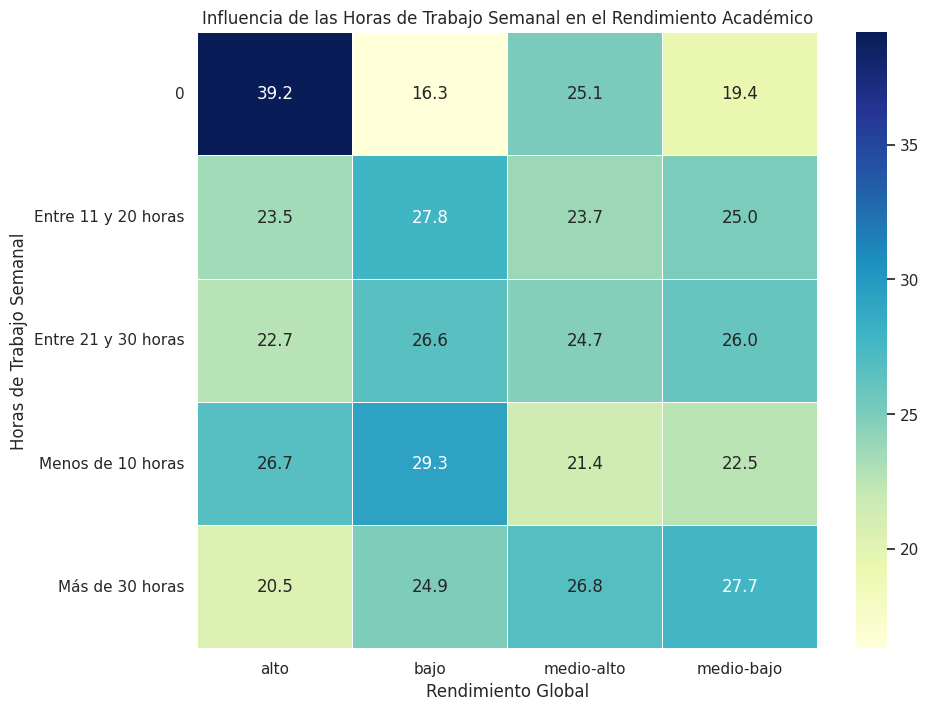

In [28]:
trabajo_vs_rendimiento = pd.crosstab(data['ESTU_HORASSEMANATRABAJA'], data['RENDIMIENTO_GLOBAL'], normalize='index') * 100
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.heatmap(trabajo_vs_rendimiento, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Influencia de las Horas de Trabajo Semanal en el Rendimiento Académico')
plt.ylabel('Horas de Trabajo Semanal')
plt.xlabel('Rendimiento Global')

plt.show()


Los estudiantes que trabajan más horas a la semana tienden a tener menores porcentajes de rendimiento alto, especialmente aquellos que trabajan más de 30 horas. Esto podría indicar que un mayor número de horas de trabajo puede interferir con el tiempo y la energía disponibles para el estudio, afectando negativamente el rendimiento académico.

#¿Como les va a los estudiantes que pagan su propia matricula?

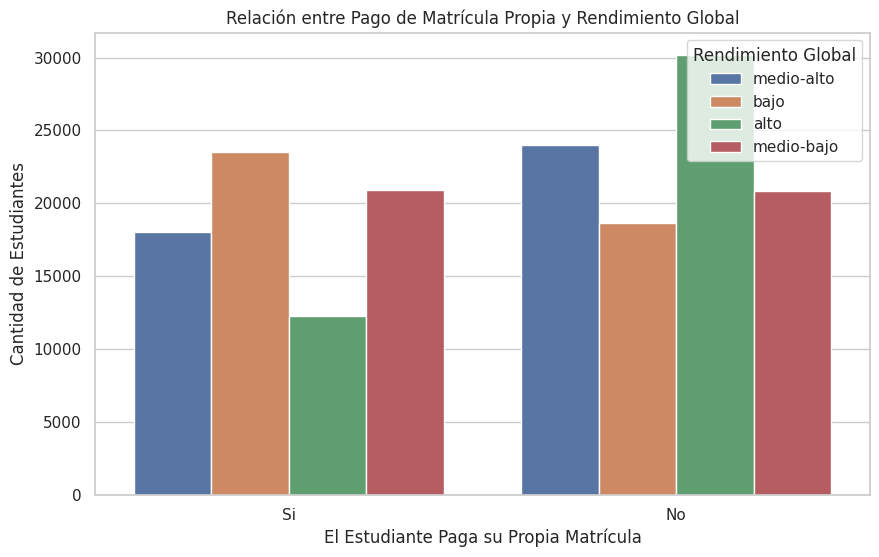

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ESTU_PAGOMATRICULAPROPIO', hue='RENDIMIENTO_GLOBAL', order=['Si', 'No'])
plt.title('Relación entre Pago de Matrícula Propia y Rendimiento Global')
plt.xlabel('El Estudiante Paga su Propia Matrícula')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Rendimiento Global')
plt.show()

Tienen un mejor rendimiento los que no pagan su matricula, todo lo contrario ocurre con los que si la pagan.

#¿El estudio del padre y madre afecta al rendimiento?

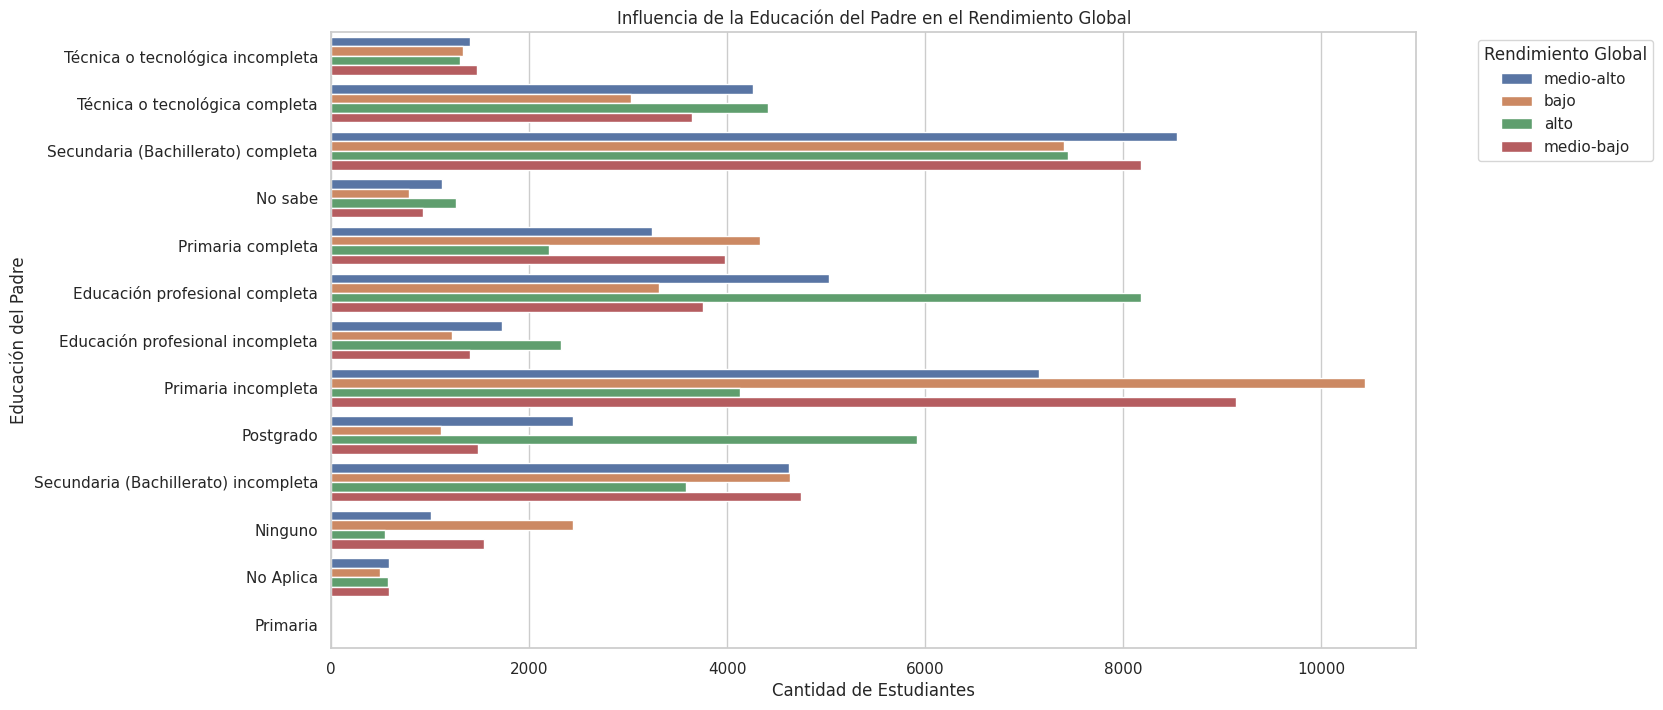

In [32]:
# Análisis de cómo la educación del padre afecta al rendimiento
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='FAMI_EDUCACIONPADRE', hue='RENDIMIENTO_GLOBAL')
plt.title('Influencia de la Educación del Padre en el Rendimiento Global')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Educación del Padre')
plt.legend(title='Rendimiento Global', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

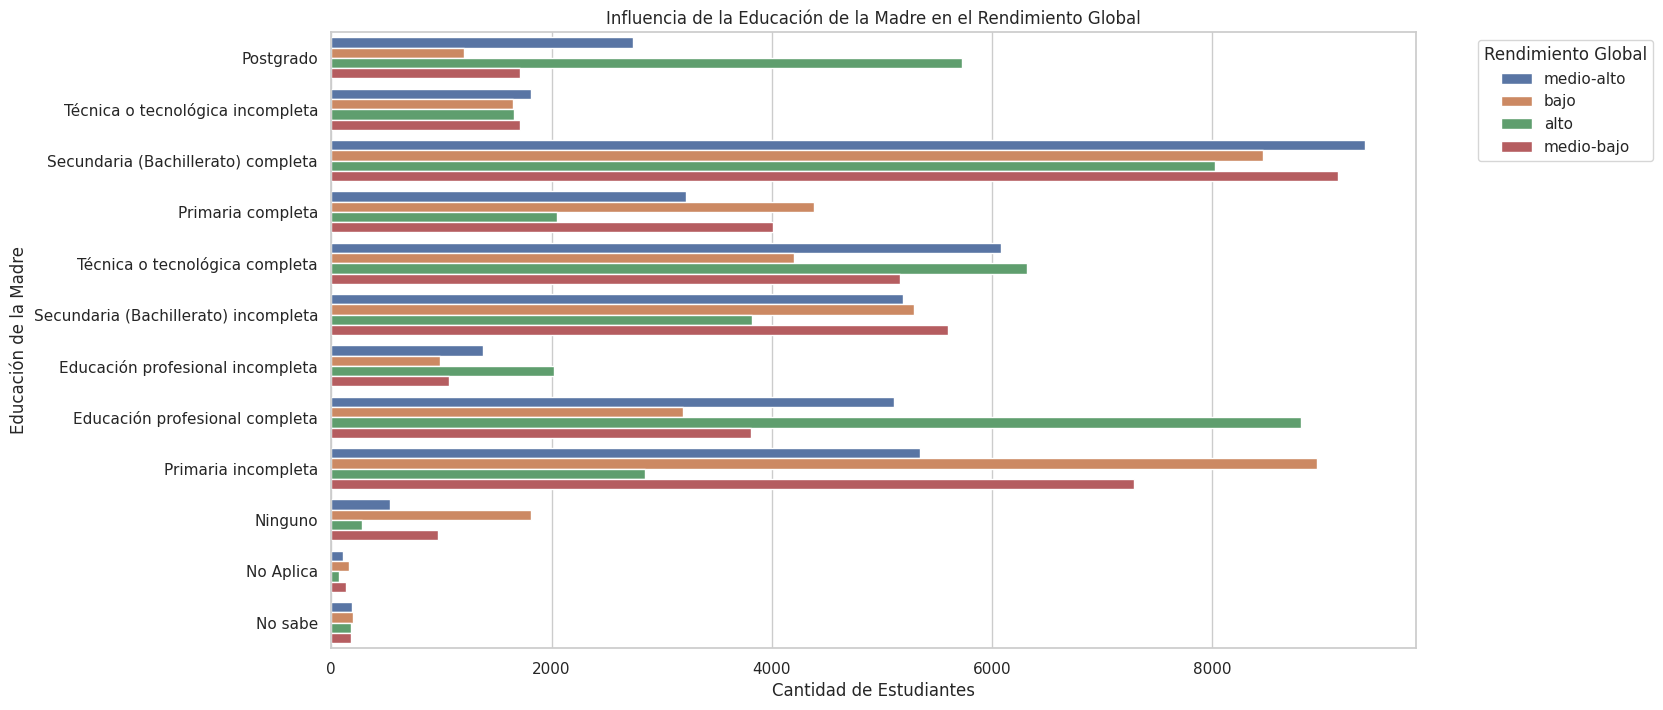

In [33]:
# Análisis de cómo la educación de la madre afecta al rendimiento
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='FAMI_EDUCACIONMADRE', hue='RENDIMIENTO_GLOBAL')
plt.title('Influencia de la Educación de la Madre en el Rendimiento Global')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Educación de la Madre')
plt.legend(title='Rendimiento Global', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Se puede ver que tanto los papás como mamás que tienen postgrado, educacion profesional completa, tecnica o tecnologia completa influyen en el rendimiento de sus hijos, haciendolos tener un rendimiento alto o medio-alto.

Mientras que los papas con primaria incompleta o secundaria incompleta tienden a influir en el rendimiento de sus hijos, teniendo ellos un rendimiento bajo o medio-bajo

##Veamos un poco los estudiantes privados del libertad

In [36]:
categorias_privado_libertad = data['ESTU_PRIVADO_LIBERTAD'].value_counts()
rendimiento_por_privado_libertad = data.groupby('ESTU_PRIVADO_LIBERTAD')['RENDIMIENTO_GLOBAL'].value_counts().unstack()

categorias_privado_libertad, rendimiento_por_privado_libertad


(N    170087
 S        10
 Name: ESTU_PRIVADO_LIBERTAD, dtype: int64,
 RENDIMIENTO_GLOBAL        alto     bajo  medio-alto  medio-bajo
 ESTU_PRIVADO_LIBERTAD                                          
 N                      43066.0  42479.0     42460.0     42082.0
 S                          NaN      4.0         2.0         4.0)

Como se pudo observar son muy pocos registros de estudiantes que si estan privados de libertad, tambien su mayoria teien rendimiento bajo o medio-bajo. En la siguiente entrega de limpieza se tomarán decisiones sobre que hacer con esta variable.